In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

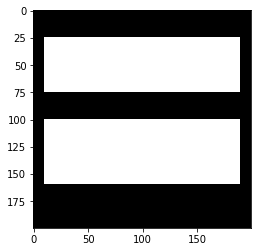

In [4]:
img = np.zeros((200,200),np.uint8)
img[25:75,10:190] = 255
img[100:160,10:190] = 255
# img = cv2.resize(img,(0,0), fx=1780/200, fy=1900/200, interpolation = cv2.INTER_AREA)
img[img>0] = 255
plt.imshow(img,'gray')

In [5]:
cv2.imwrite("img.png",img)

True

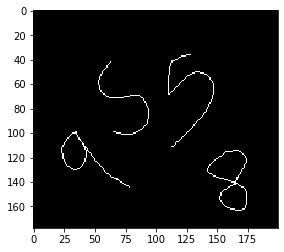

In [48]:
img = cv2.imread('test.png',0)
img[img > 127] = 150
img[img < 127] = 1
img[img == 150] = 0
plt.imshow(img,'gray')

In [5]:
import math
def checkAdjacent(ind1,ind2):
    x1,y1 = ind1
    x2,y2 = ind2
    dis = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return (dis < 2)

In [ ]:
class Line:
    def __init__(self,head):
        self.head = head
        self.last = head
        self.data = [self.head]

    def add(self,item):
        self.data.append(item)

    def checkLast():
        return self.data[-1]

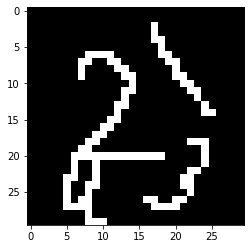

In [11]:
img = cv2.imread("t3.png",0)
img[img>0] = 1
plt.imshow(img,'gray')

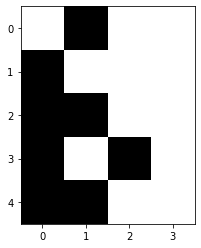

In [23]:
img = np.array([[1,0,1,1],[0,1,1,1],[0,0,1,1],[0,1,0,1],[0,0,1,1]])
plt.imshow(img,'gray')

In [12]:
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
points = []
lines = []

# print(len(indexes))
for i in range(len(indexes)):
    for j, point in enumerate(indexes):
        if points:
            if (not points[-1] ==  indexes[j]) and checkAdjacent(points[-1],indexes[j]) and (not indexes[j] in points):
                points.append(indexes[j])
        else:
            points.append(indexes[i])
    if not indexes[i] in points:
        points.append(indexes[i])


head = -1
for i,point in enumerate(points):
    if head < 0:
        head =  i
    if i < len(points)-1 and (not checkAdjacent(point,points[i+1])):
        lines.append(points[head:i+1])
        head = -1
    else:
        if i == len(points)-1:
            lines.append([point])


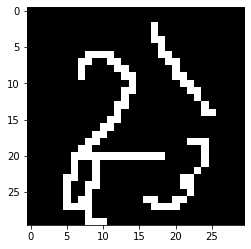

In [13]:
board = np.zeros_like(img)
for line in lines:
    for point in line:
        x,y = point
        if point == line[-1]:
            board[x,y] = 1
        else:
            board[x,y] = 1

plt.imshow(board,'gray')

In [7]:
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
lines = []
for index in indexes:
    if lines:
        line = lines[-1]
        if line["end"]:
            if checkAdjacent(line["end"],index):
                lines[-1]["end"] = index
            else:
                lines.append({"start":index,"end":None})
        else:
            lines[-1]["end"] = index
    else:
        lines.append({"start": index,"end":None})

In [10]:
for line in lines:
    print(line)

{'start': (25, 10), 'end': (25, 189)}
{'start': (26, 10), 'end': (26, 189)}
{'start': (27, 10), 'end': (27, 189)}
{'start': (28, 10), 'end': (28, 189)}
{'start': (29, 10), 'end': (29, 189)}
{'start': (30, 10), 'end': (30, 189)}
{'start': (31, 10), 'end': (31, 189)}
{'start': (32, 10), 'end': (32, 189)}
{'start': (33, 10), 'end': (33, 189)}
{'start': (34, 10), 'end': (34, 189)}
{'start': (35, 10), 'end': (35, 189)}
{'start': (36, 10), 'end': (36, 189)}
{'start': (37, 10), 'end': (37, 189)}
{'start': (38, 10), 'end': (38, 189)}
{'start': (39, 10), 'end': (39, 189)}
{'start': (40, 10), 'end': (40, 189)}
{'start': (41, 10), 'end': (41, 189)}
{'start': (42, 10), 'end': (42, 189)}
{'start': (43, 10), 'end': (43, 189)}
{'start': (44, 10), 'end': (44, 189)}
{'start': (45, 10), 'end': (45, 189)}
{'start': (46, 10), 'end': (46, 189)}
{'start': (47, 10), 'end': (47, 189)}
{'start': (48, 10), 'end': (48, 189)}
{'start': (49, 10), 'end': (49, 189)}
{'start': (50, 10), 'end': (50, 189)}
{'start': (5

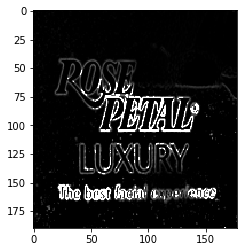

In [11]:
gimg = cv2.imread("index.jpeg",0)
igimg = 255 - gimg
blurred_img = cv2.GaussianBlur(igimg, (21,21),0)
inv_blurred_img = 255 - blurred_img
pencil_sketch_img = cv2.divide(gimg,inv_blurred_img, scale = 256.0)
pencil_sketch_img = cv2.bitwise_not(pencil_sketch_img)
pencil_sketch_img[pencil_sketch_img>127] = 255
img = pencil_sketch_img
img = cv2.medianBlur(img,11)
img_y, img_x = img.shape[:2]
img = cv2.resize(img,(0,0), fx=178/img_x, fy=190/img_y, interpolation = cv2.INTER_AREA)
img[img > 127] =1
# cv2.imwrite('indexbw.png',img)
plt.imshow(img,'gray')

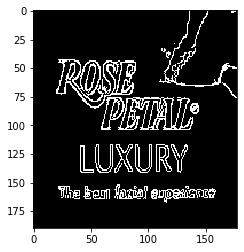

In [10]:
# Convert to black and white
oimg = cv2.imread("index.jpeg")
img_y, img_x = oimg.shape[:2]
oimg = cv2.resize(oimg, (0,0), fx=178/img_x, fy=190/img_y, interpolation = cv2.INTER_AREA) #common
gimg = cv2.cvtColor(oimg,cv2.COLOR_BGR2GRAY)
(thresh, bwimg) = cv2.threshold(gimg, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# thresh = 127
# bwimg= cv2.threshold(gimg, thresh, 255, cv2.THRESH_BINARY)[1]


# Edge Detection
imgBlurredColour = cv2.GaussianBlur(oimg, (7,7),0) #blurs to soften edges, really sure how effetive this is yet
imgBlurredBlackWhite = cv2.GaussianBlur(bwimg, (7,7),0)

imgOutlinedColour = cv2.Canny(imgBlurredColour, 100, 200) #for colour 
#processes and outputs an image, 100 200 is the ratio for acceptable edge gradation 
imgOutlinedBlackWhite = cv2.Canny(imgBlurredBlackWhite, 100, 200) #for black and white
imgOutlinedGrayscale = cv2.Canny(gimg, 100, 200)
#so that we can merge all three together to get better acuracy of the image

imgOutlinedTemp = cv2.addWeighted(imgOutlinedBlackWhite,1,imgOutlinedColour,1,0) #merges two photos together
img = cv2.addWeighted(imgOutlinedTemp,1,imgOutlinedGrayscale,1,0)#merges a third to it
img[img > 0] =1
# cv2.imwrite("indexbw.png",img)
plt.imshow(img,'gray')

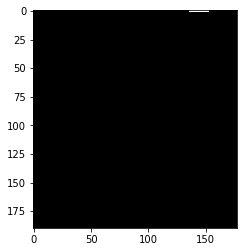

In [31]:
board = np.zeros_like(img)
board[0:2, 136:153+1] = 255
plt.imshow(board,'gray')

{'start': (0, 136), 'end': None}


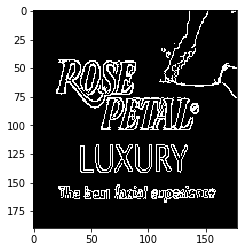

In [39]:
board = np.zeros_like(img)

indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
lines = []
for index in indexes:
    if lines:
        line = lines[-1]
        if line["end"]:
            if checkAdjacent(line["end"],index):
                lines[-1]["end"] = index
            else:
                lines.append({"start":index,"end":None})
        else:
            if checkAdjacent(line["start"],index):
                lines[-1]["end"] = index
            else:
                lines.append({"start":index,"end":None})
    else:
        lines.append({"start": index,"end":None})
print(lines[0])
left = True
for line in lines:
    x1,y1 = line["start"]
    if line["end"]:
        x2,y2 = line["end"]
        # x,y = (0,0)
        # dis1 = math.sqrt((x1-x)**2+(y1-y)**2)
        # dis2 = math.sqrt((x2-x)**2+(y2-y)**2)
        # left = (dis1 < dis2)
        if left:
            board[x1:x2+1,y1:y2+1] = 255
            # self.controller.moveAt(            breakx1*10,y1*10,True,True)
            # self.controller.moveAt(x2*10,y2*10,True,False)
        else:
            board[x2:x1,y2:y1] = 255
            # self.controller.moveAt(x2*10,y2*10,True,True)
            # self.controller.moveAt(x1*10,y1*10,True,False)

    else:
        # self.controller.moveAt(x1*10,y1*10,True,False)
        board[x1,y1] = 255
plt.imshow(board,'gray')